In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("./train.csv", index_col=0)

In [195]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
8746,220000,2,1,2,28,-1,-1,-1,-2,-2,...,0,0,0,25000,0,0,0,0,0,0
5071,180000,2,2,1,48,-1,-1,-1,-1,-1,...,27988,1480,22133,11272,26703,27988,1480,22133,0,0
8655,30000,1,1,1,47,2,2,8,8,8,...,2400,2400,2400,0,0,0,0,0,0,1
7465,100000,2,2,2,25,0,0,0,-1,-1,...,674,0,980,1000,0,674,0,980,4413,0
21115,480000,1,1,1,49,0,0,0,0,0,...,410694,407436,407809,20000,18000,15000,15000,14000,13000,0


In [196]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,167436.093333,1.598333,1.858056,1.547333,35.562722,-0.007889,-0.131667,-0.167278,-0.219389,-0.264444,...,43343.487000,40276.967111,38878.076556,5550.193389,5.870833e+03,5230.393056,4715.353889,4797.447222,5228.945556,0.219833
std,129809.694131,0.490249,0.793969,0.524084,9.237059,1.134513,1.197622,1.201313,1.178559,1.144517,...,64373.012125,60841.747882,59554.705894,15161.478523,1.933595e+04,17985.298810,14224.402358,15532.792874,18139.248003,0.414145
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2231.750000,1685.250000,1200.000000,1000.000000,8.125000e+02,390.000000,260.000000,227.500000,99.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18121.500000,16787.500000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54490.250000,49968.750000,49402.500000,5000.000000,5.000000e+03,4500.000000,4000.000000,4021.250000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,405016.000000,1.024516e+06,896040.000000,331788.000000,426529.000000,528666.000000,1.000000


In [197]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [198]:
x=df.iloc[:,:23].values
y=df["default payment next month"].values

# ここから書き換える
## いろいろ確認しましょう
* グラフを書いてそれぞれの変数を確認
* どの変数をモデルに含めるか？

In [199]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)
ss = StandardScaler()
ss.fit(x_train)
x_train_ss = ss.transform(x_train)
x_test_ss = ss.transform(x_test)

model = LogisticRegression()
model.fit(x_train_ss, y_train)

print("train:",model.score(x_train_ss,y_train))
print("test:",model.score(x_test_ss,y_test))

train: 0.8016613118094194
test: 0.8095909732016925


In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

df_scaled = df.copy()

for col in ["LIMIT_BAL","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]:
    std = np.std(df_scaled[col])
    avg = np.mean(df_scaled[col])
    df_scaled = df_scaled[(df_scaled[col]-avg)/std < 5]
    df_scaled[col] = np.log(df_scaled[col]*np.e + 1)-1
    df_scaled[col] = (df_scaled[col] - np.mean(df_scaled[col])) / np.std(df_scaled[col])
    
df_mod = df_scaled.drop(columns=["AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"])
df_mod["SEX"] = df_mod["SEX"] - 1
onehot = pd.get_dummies(df_mod["MARRIAGE"],prefix="marr")
df_mod = pd.concat([df_mod, onehot], axis=1)
df_mod = df_mod.drop(columns=["MARRIAGE","marr_0","marr_2","marr_3"])

df_mod["PAY_SCORE"] = 3 * df_mod["PAY_0"] + 2 * df_mod["PAY_2"] + df_mod["PAY_3"] + df_mod["PAY_4"] + df_mod["PAY_5"] + df_mod["PAY_6"]
df_mod["PAY_SCORE"] = (df_mod["PAY_SCORE"] - np.mean(df_mod["PAY_SCORE"])) / np.std(df_mod["PAY_SCORE"])
df_mod = df_mod[(df_mod["EDUCATION"] > 0) & (df_mod["EDUCATION"] <= 4)]
df_mod["EDU_SCORE"] = np.exp((df_mod["EDUCATION"]-4)*(-0.5)) - 1

df_mod = df_mod.drop(columns=["EDUCATION","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"])

x = df_mod.drop(columns="default payment next month").values
y = df_mod["default payment next month"].values

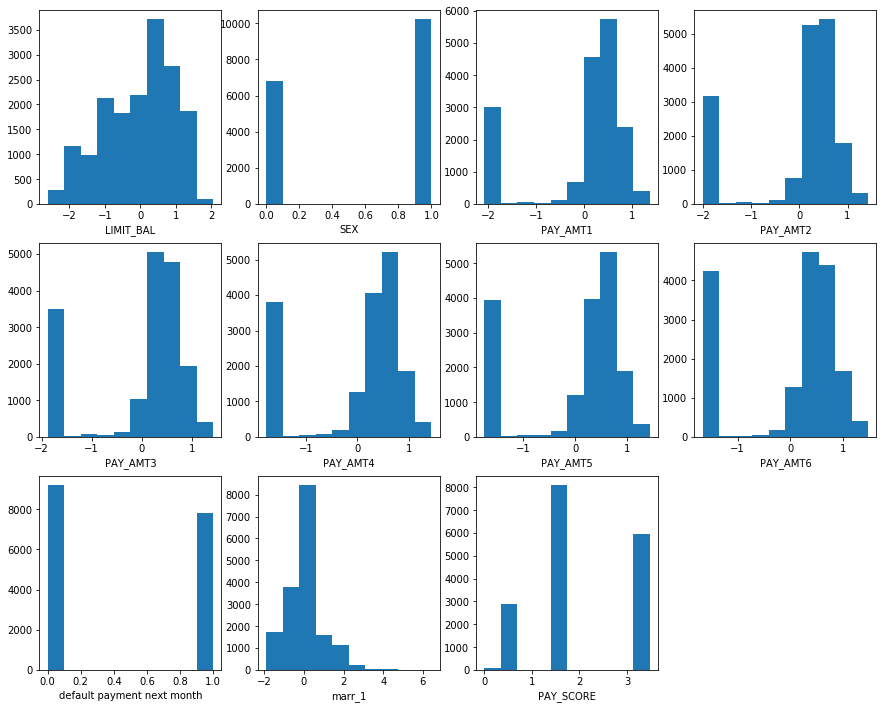

In [202]:
plt.figure(figsize=(15,25))
for i in range(11):
    plt.subplot(6,4,i+1)
    plt.hist(x[:,i])
    plt.xlabel(df_mod.columns.values[i])
plt.show()

In [203]:
df_mod.corr()

,LIMIT_BAL,SEX,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,marr_1,PAY_SCORE,EDU_SCORE
LIMIT_BAL,1.000000,0.075917,0.089727,0.089984,0.100896,0.122265,0.136025,0.177272,-0.168850,0.111464,-0.349506,0.276191
SEX,0.075917,1.000000,-0.012917,-0.002268,0.009303,0.012672,0.003675,0.025258,-0.041519,0.036271,-0.077647,-0.011186
PAY_AMT1,0.089727,-0.012917,1.000000,0.416019,0.450299,0.394384,0.360100,0.339683,-0.176805,-0.015929,-0.005671,-0.025536
PAY_AMT2,0.089984,-0.002268,0.416019,1.000000,0.440885,0.464030,0.415314,0.406856,-0.140806,-0.006763,0.049988,-0.022275
PAY_AMT3,0.100896,0.009303,0.450299,0.440885,1.000000,0.447713,0.485000,0.435801,-0.137433,-0.007972,0.080127,-0.024879
PAY_AMT4,0.122265,0.012672,0.394384,0.464030,0.447713,1.000000,0.460432,0.500191,-0.110393,0.000515,0.083846,-0.018277
PAY_AMT5,0.136025,0.003675,0.360100,0.415314,0.485000,0.460432,1.000000,0.494398,-0.099723,-0.001927,0.091640,-0.008641
PAY_AMT6,0.177272,0.025258,0.339683,0.406856,0.435801,0.500191,0.494398,1.000000,-0.103881,0.005834,0.084497,-0.004941
default payment next month,-0.168850,-0.041519,-0.176805,-0.140806,-0.137433,-0.110393,-0.099723,-0.103881,1.000000,0.027539,0.320491,-0.057001
marr_1,0.111464,0.036271,-0.015929,-0.006763,-0.007972,0.000515,-0.001927,0.005834,0.027539,1.000000,-0.020733,-0.162620


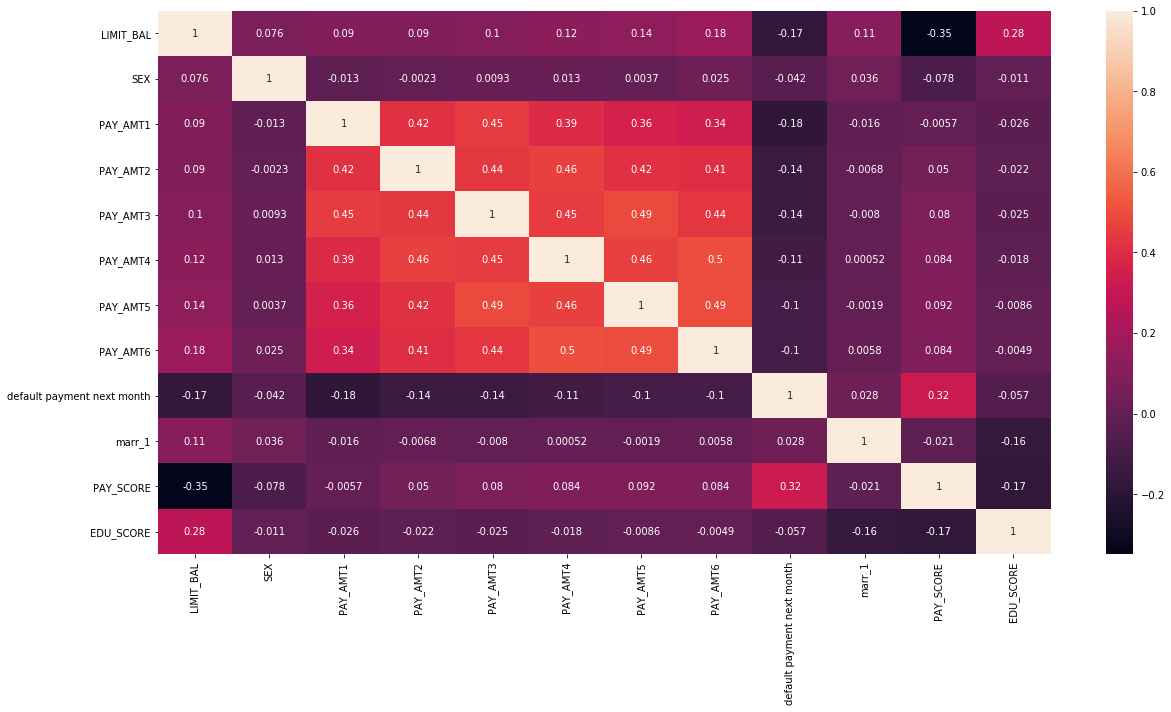

In [204]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df_mod.corr(),annot=True)

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

# tscore = np.zeros(29)
# testscore = np.zeros(29)
# for i in range(1,30):
#     model = KNeighborsClassifier(n_neighbors=i)
#     model.fit(x_train,y_train)
#     tscore[i-1] = model.score(x_train,y_train)
#     testscore[i-1] = model.score(x_test,y_test)

# plt.figure(figsize=(15,10))
# plt.plot(tscore)
# plt.plot(testscore)
# plt.show()

model = KNeighborsClassifier(n_neighbors=27)
model.fit(x_train,y_train)

print("train:",model.score(x_train,y_train))
print("test:",model.score(x_test,y_test))

# scores = cross_val_score(model, x, y, cv=5)

# print(scores)
# print(np.mean(scores))

train: 0.8051876812162057
test: 0.8023037141513869


In [206]:
from sklearn.tree import DecisionTreeClassifier 

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=15)
model.fit(x_train,y_train)

print("train:",model.score(x_train,y_train))
print("test:",model.score(x_test,y_test))

scores = cross_val_score(model, x, y, cv=5)

print(scores)
print(np.mean(scores))

train: 0.9097249431862706
test: 0.7731546779501646
[0.76667646 0.77049662 0.7678519  0.77284749 0.76726418]
0.7690273288275051


In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

pg = {"C": [0.001,0.01,0.1,1,10,100],"gamma": [0.001,0.01,0.1,1,10,100]}
gs = GridSearchCV(estimator = SVC(), param_grid = pg, cv=5)
gs.fit(X_train,y_train)

print(gs.best_score_)
print(gs.best_params_)
print(gs.score(X_test,y_test))

KeyboardInterrupt: 

In [223]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x,y ,random_state=1)

model = RandomForestClassifier(n_estimators=1000,random_state=1)
model.fit(X_train,y_train)

print("train:",model.score(X_train,y_train))
print("test:",model.score(X_test,y_test))

# scores = cross_val_score(model, x, y, cv=5)

# print(scores)
# print(np.mean(scores))

train: 0.995925084241047
test: 0.8053596614950634


# ここまでを書き換える

In [232]:
test=pd.read_csv("./test.csv",index_col=0)#読み込む

In [233]:
test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
27967,360000,2,1,2,27,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
25222,130000,2,3,2,24,0,0,0,0,0,...,106971,57434,58593,60504,4600,4500,2802,2050,2800,2300
22047,210000,2,1,2,25,0,0,0,0,0,...,60713,61949,61908,59914,3000,2500,6259,5000,3000,5000
764,90000,2,3,2,29,-1,2,-1,-1,-1,...,2121,3113,0,0,0,3509,3113,0,0,0
5233,50000,1,2,1,35,1,2,0,0,0,...,32007,34474,37905,38131,1000,3000,3000,4000,1000,10000


In [234]:
df_scaled = test.copy()

for col in ["LIMIT_BAL","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]:
    std = np.std(df_scaled[col])
    avg = np.mean(df_scaled[col])
    df_scaled[col] = np.log(df_scaled[col]*np.e + 1)-1
    df_scaled[col] = (df_scaled[col] - np.mean(df_scaled[col])) / np.std(df_scaled[col])
    
df_mod = df_scaled.drop(columns=["AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"])
df_mod["SEX"] = df_mod["SEX"] - 1
onehot = pd.get_dummies(df_mod["MARRIAGE"],prefix="marr")
df_mod = pd.concat([df_mod, onehot], axis=1)
df_mod = df_mod.drop(columns=["MARRIAGE","marr_0","marr_2","marr_3"])

df_mod["PAY_SCORE"] = 3 * df_mod["PAY_0"] + 2 * df_mod["PAY_2"] + df_mod["PAY_3"] + df_mod["PAY_4"] + df_mod["PAY_5"] + df_mod["PAY_6"]
df_mod["PAY_SCORE"] = (df_mod["PAY_SCORE"] - np.mean(df_mod["PAY_SCORE"])) / np.std(df_mod["PAY_SCORE"])
df_mod["EDU_SCORE"] = np.exp((df_mod["EDUCATION"]-4)*(-0.5)) - 1

df_mod = df_mod.drop(columns=["EDUCATION","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"])

xx = df_mod.values

In [235]:
yy=model.predict(xx) #上で作ったmodelでxxについての予測をyyとして作る

In [236]:
sub = pd.DataFrame(yy,columns=["default payment next month"],index=test.index)
#test.csvのIDと"default payment next month"のcolumns名を持った新しいデータフレームをyyで作る

In [237]:
sub.head()#確認

,default payment next month
ID,
27967,0
25222,0
22047,0
764,0
5233,0


In [238]:
sub.to_csv("submission.csv") #submission_test.csvとして、保存
#このファイルをサブミットできます

# より良い予測を目指してください。